# **Séries Temporais**

# TRANSFORMAÇÃO E DIFERENCIAÇÃO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

### **Transformação**

Transformar a série que não tenha distribuição normal em uma série com distribuição aproximadamente normal

**AirPassengers: dados clássicos da companhia aérea Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionais, 1949 a 1960.**
 

In [3]:
dados = pd.read_csv('AirPassengers.csv', sep=',')

In [4]:
dados

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
serie = pd.Series(dados['Passengers'].values, index = dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

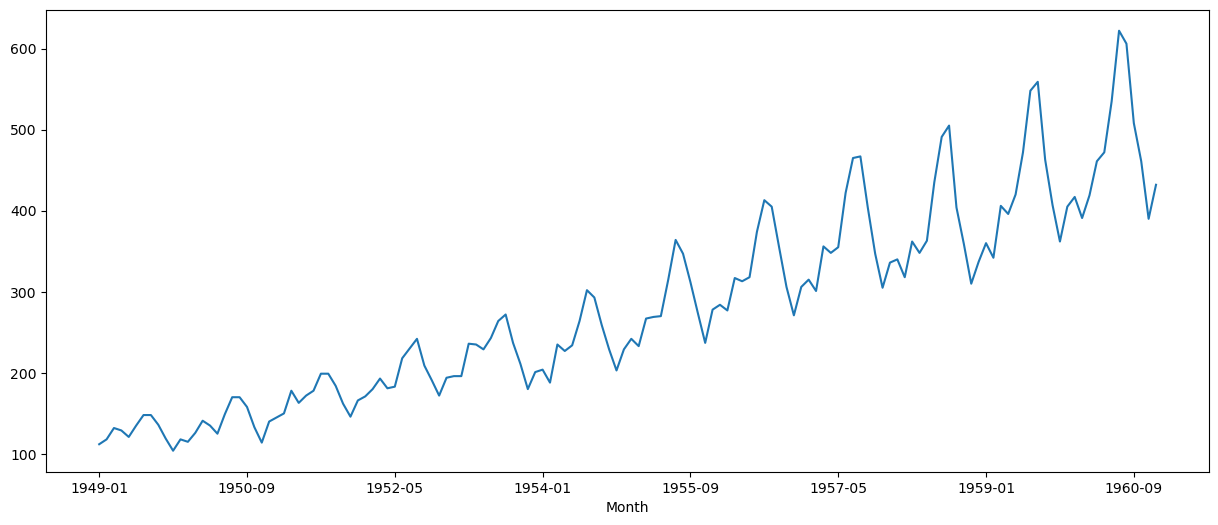

In [6]:
serie.plot()
plt.show()

Tendencia crescente ao longo dos anos e sazonalidade clara, onde de tempos em tempos (regulares) há picos bem marcados. Esses picos começam com uma amplitude pequena e vai aumentando ao passar dos anos.

***Verificando a normalidade dos dados***

In [7]:
import scipy.stats as stats

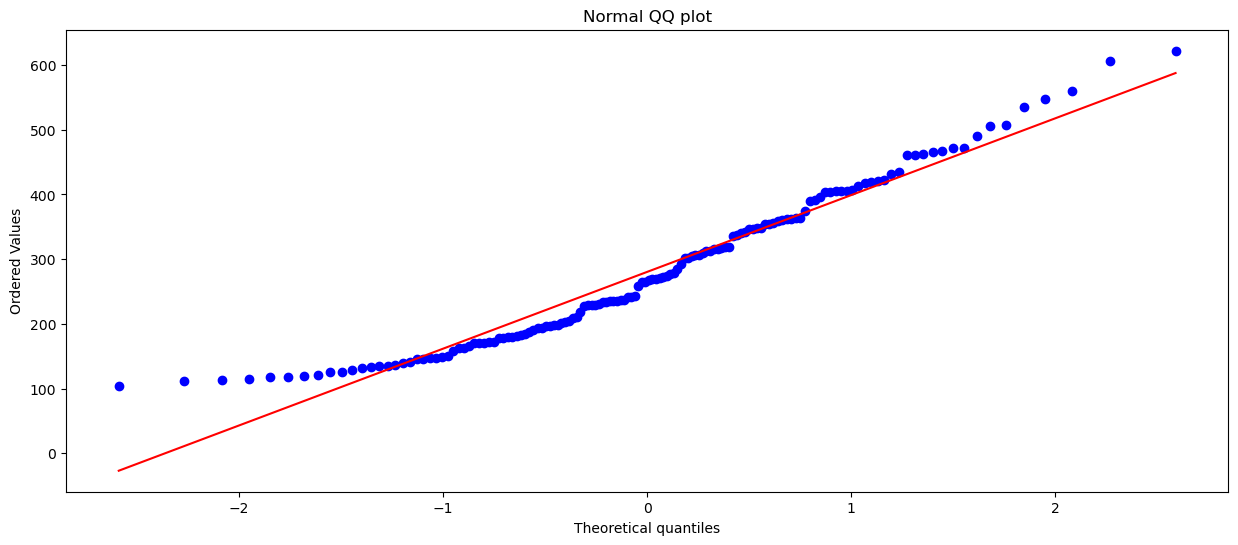

In [8]:
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Serie aparentemente demonstra problemas de normalidade no começo e um pouco no final, pois é onde ela se distancia da linha.

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

* H0: A série segue uma distribuição aproximadamente normal QUANDO p > 0,05.
* Ha: A série NÃO segue uma distribuição aproximadamente normal QUANDO p < 0,05.

In [9]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9519579410552979
p-valor: 6.832739018136635e-05


Como p é menor que 0,05 podemos dizer que a distribuição não é normal.

Para tentarmos resolver esse problema podemos utilizar a transformação logarítmica ou exponencial

### Transformação por log 

Diminui variância e melhora normalidade

Aplica a função logarítmica em todos os dados da série

In [10]:
serie2 = np.log(serie)
serie2

Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

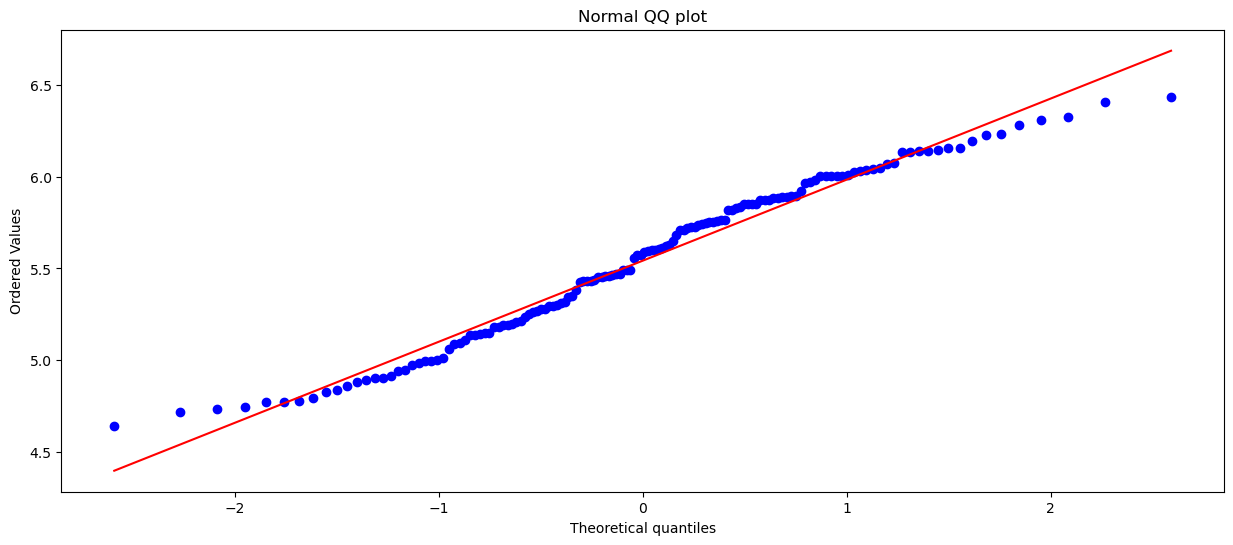

In [11]:
stats.probplot(serie2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Observa-se que o início da série a uma aproximação com a linha de referencia, porem o fim da série houve um afastamento maior. Há uma possível na normalidade dos dados.

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

* H0: A série segue uma distribuição aproximadamente normal QUANDO p > 0,05.
* Ha: A série NÃO segue uma distribuição aproximadamente normal QUANDO p < 0,05.

In [12]:
e, p = stats.shapiro(serie2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9732357859611511
p-valor: 0.00637402106076479


Observa-se uma melhoria na normalidade pela proximidade o p-valor com o nivel de significância, porem ainda não temos dados normais

### Transformação por raiz cúbica

Transformação muito utilizada quando a série possui dados com valor zero ou negativos

In [13]:
serie3 = (serie)**(1/3)
serie3

Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

No python sempre que temos o operador de raiz e tivermos números negativos ele fará um tratamento transformando os números em números complexos.

Quando a raiz é quadrada, não existe um numero real que retorne uma raiz negativa (apenas um número complexo), agora se for raiz cubica existiria núneros reais.

Aparece NaN - valor missing

In [14]:
serie_3 = np.sign(serie)*abs(serie)**(1/3)
serie_3

Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

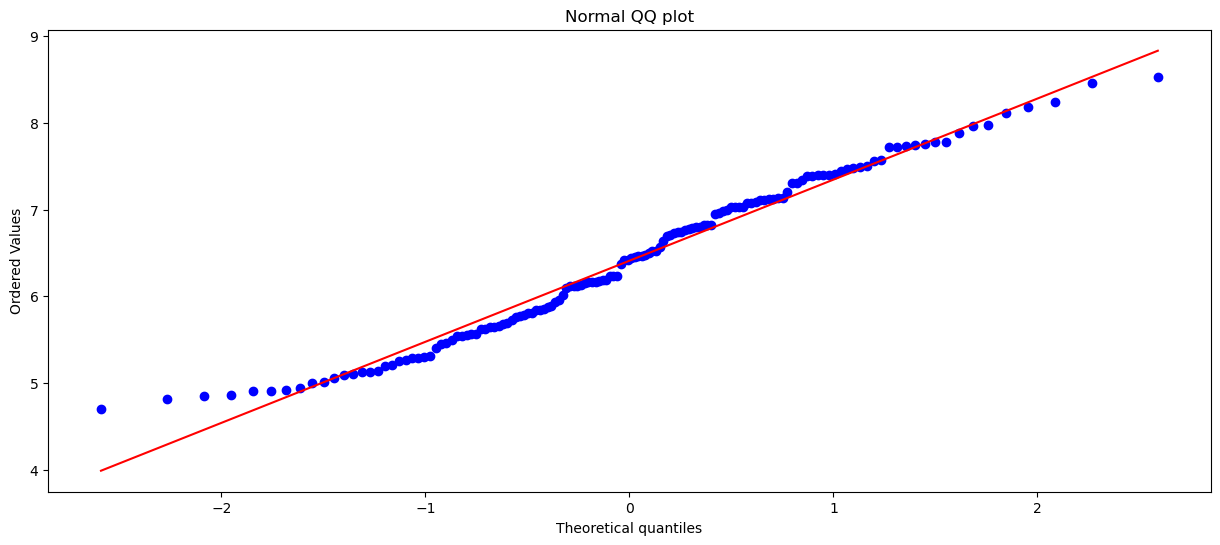

In [15]:
stats.probplot(serie_3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Ajusta melhor o final da série , porem no inicio ainda existe um afastamento da linha de referencia. Aparentemente melhorou a normalidade da série

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

* H0: A série segue uma distribuição aproximadamente normal QUANDO p > 0,05.
* Ha: A série NÃO segue uma distribuição aproximadamente normal QUANDO p < 0,05.

In [16]:
e, p = stats.shapiro(serie_3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.974599301815033
p-valor: 0.008835508488118649


Verificando a normalidade dos dados com o histograma

C:\Users\anail\AppData\Local\Temp\ipykernel_38180\3476620052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie); #serie original
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


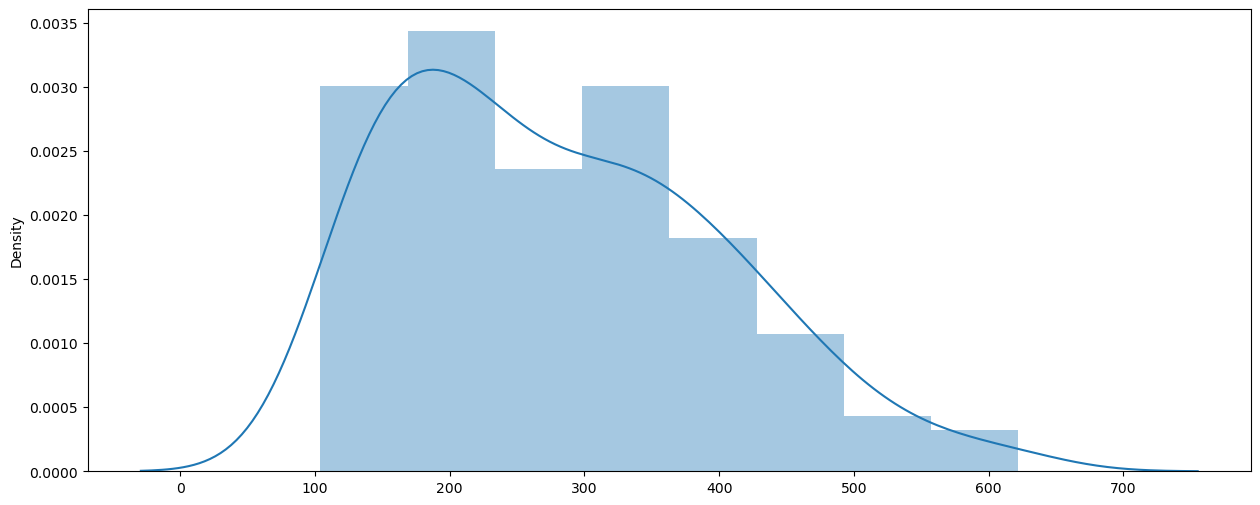

In [17]:
import seaborn as sns
sns.distplot(serie); #serie original

C:\Users\anail\AppData\Local\Temp\ipykernel_38180\442880662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie2); #serie transformada com log
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


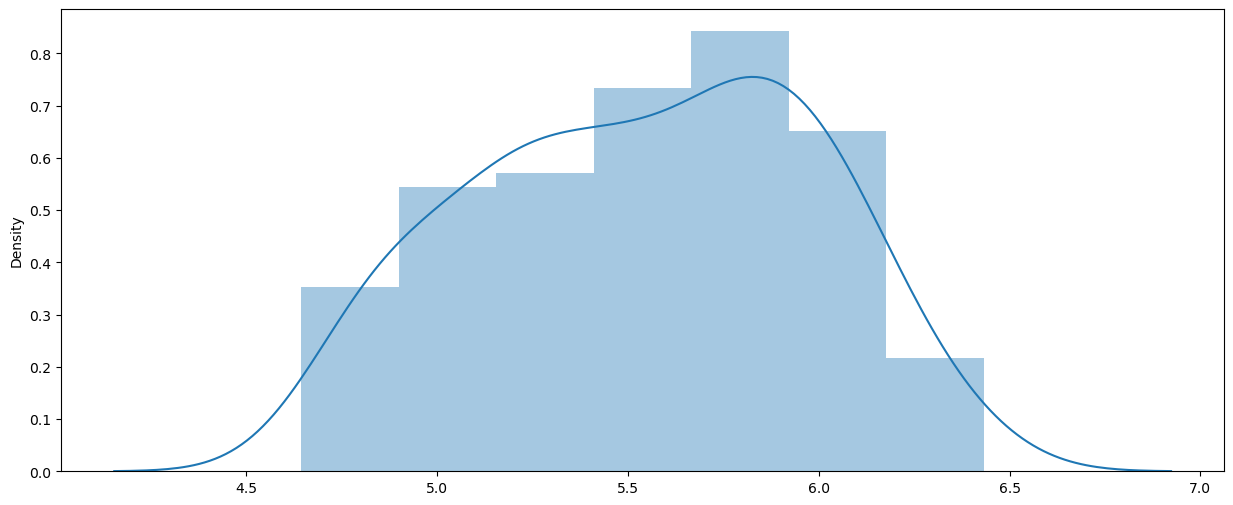

In [18]:
sns.distplot(serie2); #serie transformada com log

C:\Users\anail\AppData\Local\Temp\ipykernel_38180\3840144360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_3) #serie transformada com a raiz cubica(exponencial)
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

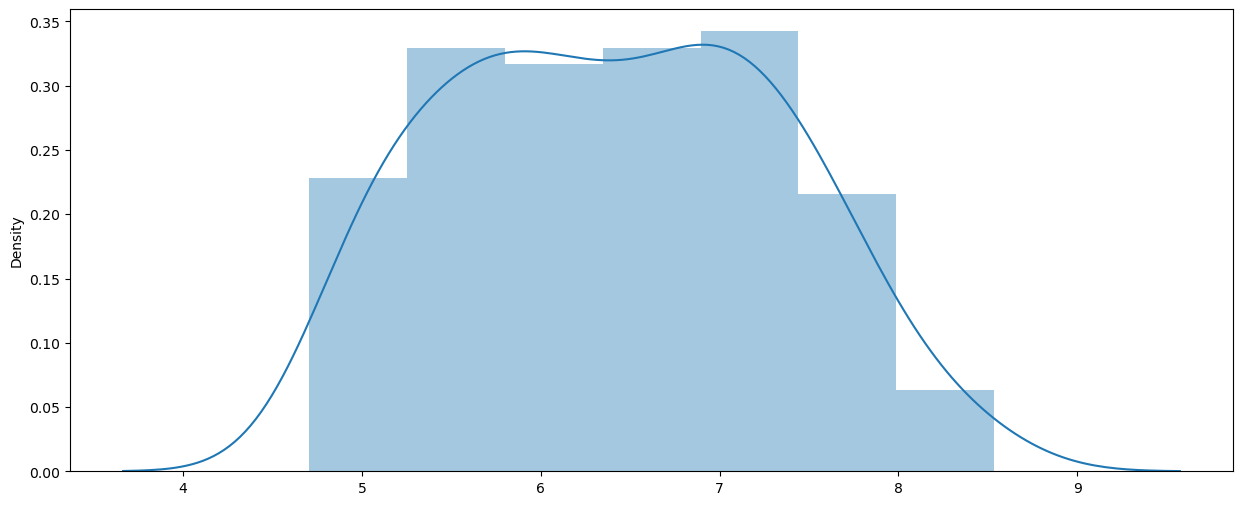

In [19]:
sns.distplot(serie_3) #serie transformada com a raiz cubica(exponencial)

Buscamos o formato de sino, da curva normal.

### **DIFERENCIAÇÃO**

Transformar uma série não estacionária em uma série estacionária 

In [20]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico (p-valor < 0,05)

Ho = é estacionário:  estatística do teste < valor crítico  (p-valor > 0,05)

In [21]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.6735
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\anail\AppData\Local\Temp\ipykernel_38180\1748613426.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie3)


Como temos a estatística(1.6735) do teste é maior que o valor crítico(0.4630), temos que a série não é estacionária

Teste df (Dickey Fuller)

Ho = não é estacionário: estatística do teste >= valor crítico (p-valor > 0,05)

Ha = é estacionário:  estatística do teste < valor crítico (p-valor < 0,05)

In [22]:
df = statsmodels.tsa.stattools.adfuller(serie3)
print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -0.8100
p_valor: 0.81615655
Valores Críticos:
1%: -3.4817
5%: -2.8840
10%: -2.5788


Como temos a estatística(-0.8100) do teste é maior que o valor crítico(-2.8840), temos que a série não é estacionária

Fazendo a diferenciação

Lembrando que iremos perder o primeiro valor pois não temos o antecessor para subtrair

In [23]:
serie4 = np.diff(serie3)

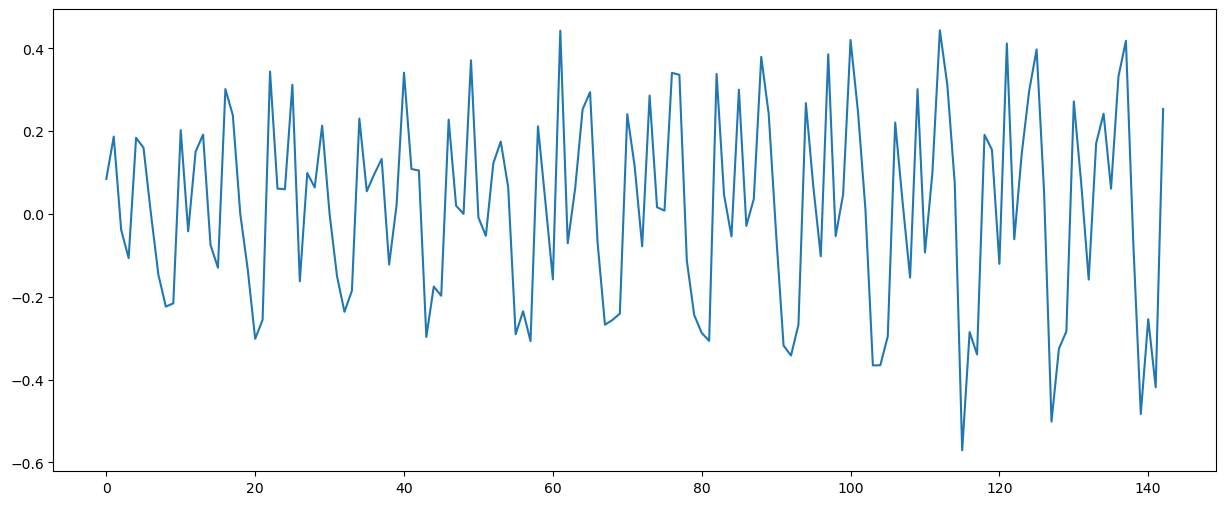

In [24]:
plt.plot(serie4)
plt.show()

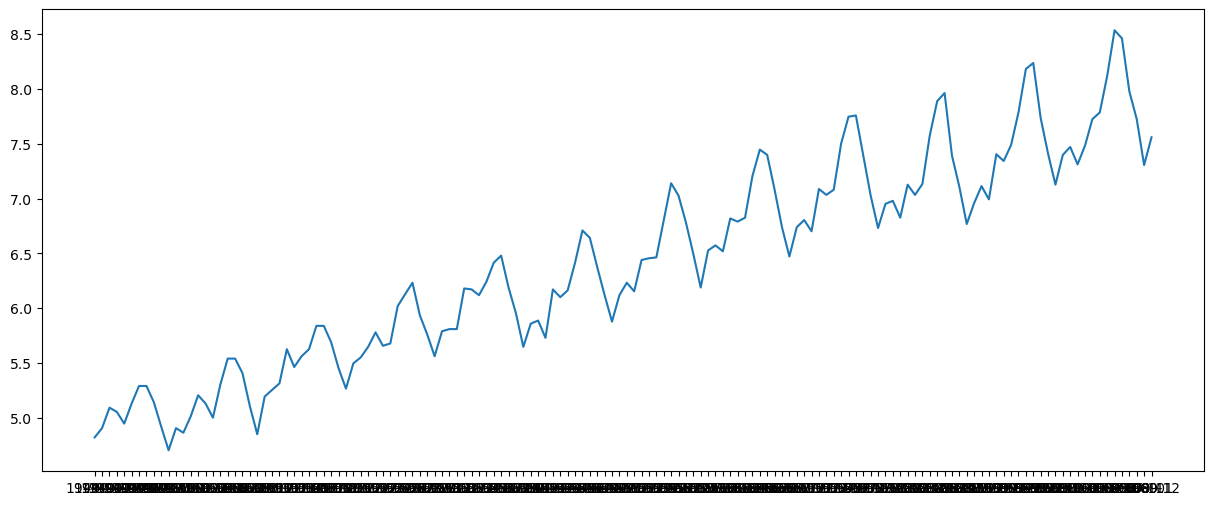

In [25]:
plt.plot(serie3)
plt.show()

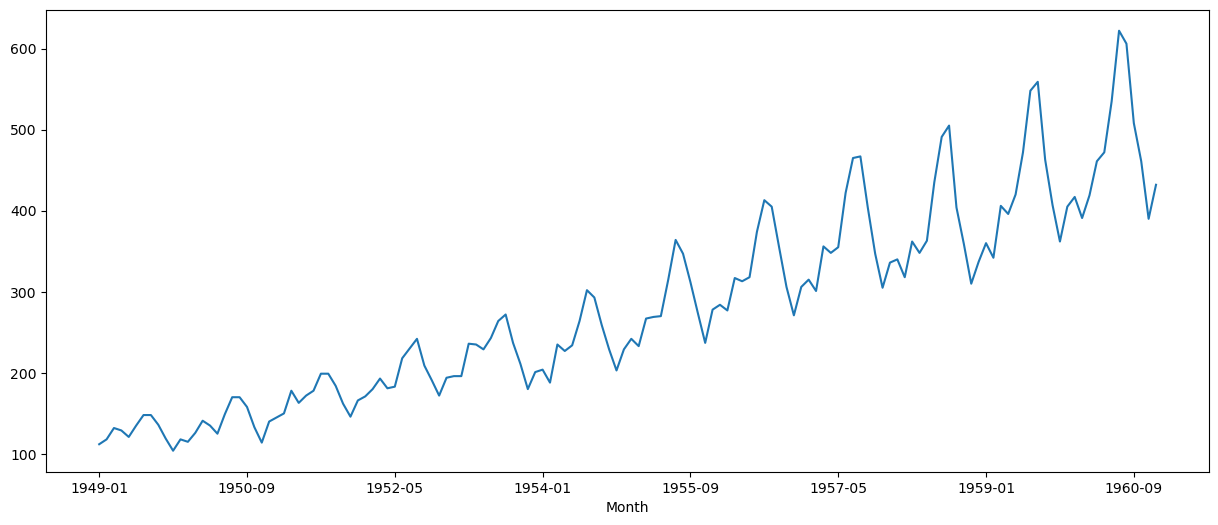

In [26]:
serie.plot()
plt.show()

Desmostrando como é realizada a diferenciação :

Subtração da série por um valor antecessor dela mesma

In [27]:
serie_diff = serie3 - serie3.shift()
#shift -> valor antecessor 

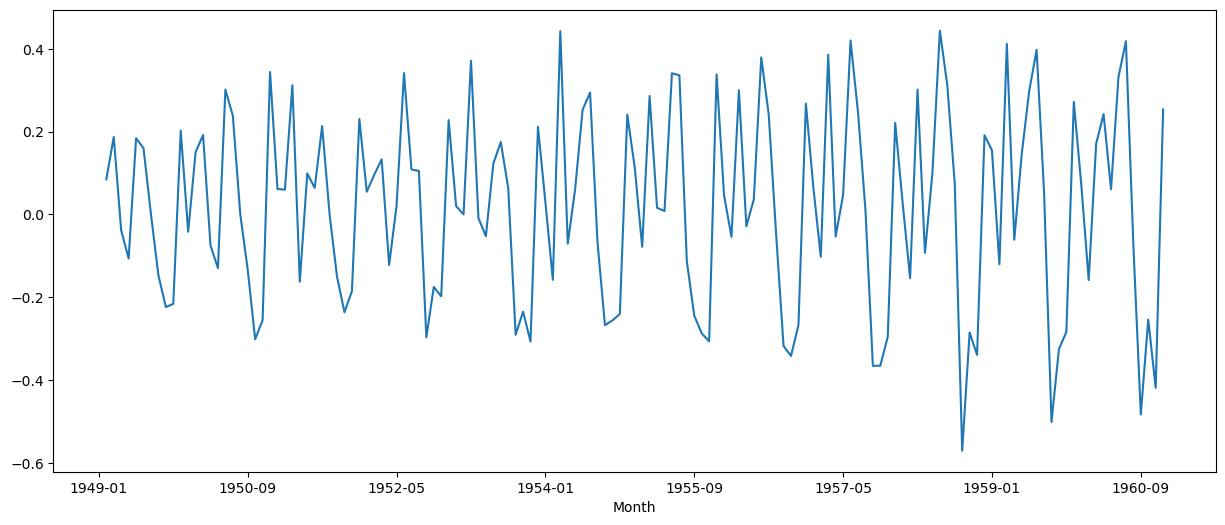

In [28]:
serie_diff.plot()
plt.show()

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário:  estatística do teste < valor crítico

In [29]:
kpss = statsmodels.tsa.stattools.kpss(serie4)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0266
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\anail\AppData\Local\Temp\ipykernel_38180\3851743177.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie4)


Como a estatística(0.0266) do teste é menor que o valor crítico(0.4630), temos que a série é estacionária

Caso não tivesse chegado a estacionaridade poderíamos realizar a Diferenciação de segunda ordem.


In [30]:
serie5 = np.diff(serie4)

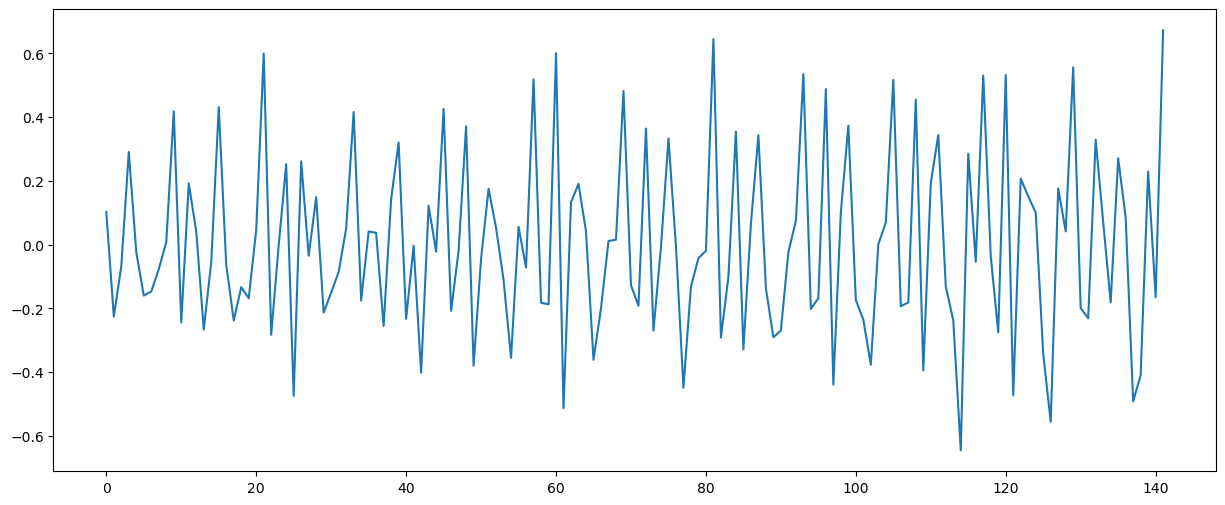

In [31]:
plt.plot(serie5)
plt.show()

In [32]:
kpss = statsmodels.tsa.stattools.kpss(serie5)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0762
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\anail\AppData\Local\Temp\ipykernel_38180\1100002076.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie5)


### REVERSÃO DA TRANSFORMAÇÃO E DIFERENCIAÇÃO

Ao realizarmos a transformação e diferenciação das séries temporais alteramos os valores das séries, logo para fazermos previsões temos que realizar a reversão da trasnformação e diferenciação das séries - queremos fazer previsões na escala original

Transformação por log (Este log é o logaritmo natural(ln), tem base e)

In [33]:
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

In [34]:
serie2 = np.log(serie)
serie2

Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

log = logatitimo natural de base e

In [35]:
serie_revertida =  np.e**serie2
serie_revertida

Month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Length: 144, dtype: float64

Transformação de logaritmo de base 10

In [36]:
serie2 = np.log10(serie)
serie2

Month
1949-01    2.049218
1949-02    2.071882
1949-03    2.120574
1949-04    2.110590
1949-05    2.082785
             ...   
1960-08    2.782473
1960-09    2.705864
1960-10    2.663701
1960-11    2.591065
1960-12    2.635484
Length: 144, dtype: float64

In [37]:
serie_revertida =  10**serie2
serie_revertida

Month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Length: 144, dtype: float64

### REVERSÃO DA TRANSFORMAÇÃO POR RAIZ CÚBICA

Transformação por raiz cúbica (quando possui dados com valor zero ou negativos)

In [38]:
serie3 = (serie)**(1/3)
serie3

Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

In [39]:
serie_revertida = serie3**3
serie_revertida

Month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Length: 144, dtype: float64

### REVERSÃO DA DIFERENCIAÇÃO

Diferenciação - difereça do valor da serie pelo seu antecessor 

Lembrando que iremos perder o primeiro valor pois não temos o antecessor para subtrair

In [40]:
serie_diferenciada = serie.diff()
serie_diferenciada

Month
1949-01     NaN
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Length: 144, dtype: float64

In [41]:
serie_revertida = serie.shift(1) + serie_diferenciada
serie_revertida
#shift(1) -> valor antecessor

Month
1949-01      NaN
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Length: 144, dtype: float64

**Organizando num dataframe**

Fazer a diferenciação dos valores que estão na coluna Passengers e criar uma coluna no Dataframe com o nome: valores_diferenciados

In [42]:
dados['valores_diferenciados'] = dados['Passengers'].diff()
dados

,Month,Passengers,valores_diferenciados
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


Reverter a diferenciação da coluna valores_diferenciados e criar mais uma coluna com o nome valores_revertidos

In [43]:
dados['valores_revertidos'] = dados['Passengers'].shift(1) + dados['valores_diferenciados']
dados

,Month,Passengers,valores_diferenciados,valores_revertidos
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,118.0
2,1949-03,132,14.0,132.0
3,1949-04,129,-3.0,129.0
4,1949-05,121,-8.0,121.0
...,...,...,...,...
139,1960-08,606,-16.0,606.0
140,1960-09,508,-98.0,508.0
141,1960-10,461,-47.0,461.0
142,1960-11,390,-71.0,390.0
